In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
df=pd.read_csv('C:\\Users\\admin\\Downloads\\groceries_dataset.csv',header=None)

In [8]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,pot plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(9835, 32)

In [10]:
records = []
for i in range (0, 9835):
    records.append([str(df.values[i,j]) for j in range(0, 20)])

In [11]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)
df1 = pd.DataFrame(array, columns = TE.columns_)
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df_clean = df1.drop(['nan'], axis = 1)
df_clean

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
count = df_clean.loc[:,:].sum()
df2 = count.sort_values(0, ascending = False).head(20)
df2 = df2.to_frame()
df2 = df2.reset_index()
df2 = df2.rename(columns = {"index": "items",0: "count"})
df2

,items,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1808
3,soda,1713
4,yogurt,1372
5,bottled water,1086
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,968
9,sausage,924


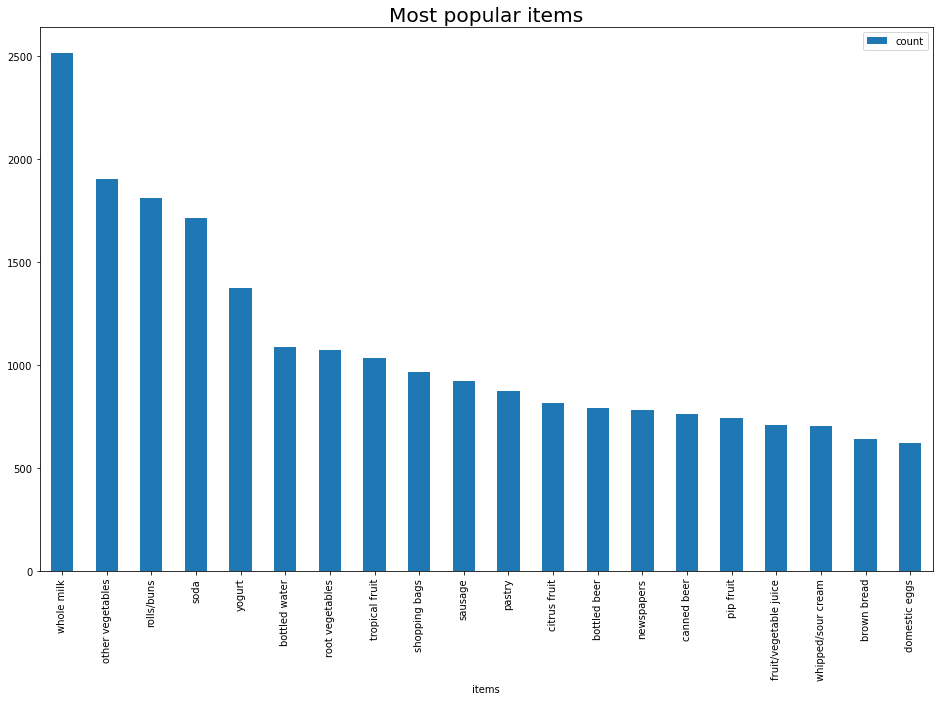

In [14]:
plt.rcParams['figure.figsize'] = (16, 10)
ax = df2.plot.bar(x = 'items', y = 'count')
plt.style.use('fivethirtyeight')
plt.title('Most popular items')
plt.show()

In [14]:
tot_item = sum(df_clean.sum())
tot_item

43266

In [15]:
df2['Item_percent'] = df2['count']/tot_item
df2['Tot_percent'] = df2.Item_percent.cumsum()
df2.head(20)

,items,count,Item_percent,Tot_percent
0,whole milk,2513,0.058083,0.058083
1,other vegetables,1903,0.043984,0.102066
2,rolls/buns,1808,0.041788,0.143854
3,soda,1713,0.039592,0.183447
4,yogurt,1372,0.031711,0.215157
5,bottled water,1086,0.025101,0.240258
6,root vegetables,1072,0.024777,0.265035
7,tropical fruit,1032,0.023852,0.288887
8,shopping bags,968,0.022373,0.311261
9,sausage,924,0.021356,0.332617


In [16]:
def prune_dataset(olddf, len_transaction, tot_sales_percent):
    if 'tot_items' in olddf.columns:
        del(olddf['tot_items'])
    Item_count = olddf.sum().sort_values(ascending = False).reset_index()
    tot_items = sum(olddf.sum().sort_values(ascending = False))
    Item_count.rename(columns={Item_count.columns[0]:'Item_name',Item_count.columns[1]:'Item_count'}, inplace=True)
    Item_count['Item_percent'] = Item_count['Item_count']/tot_items
    Item_count['Tot_percent'] = Item_count.Item_percent.cumsum()
    selected_items = list(Item_count[Item_count.Tot_percent < tot_sales_percent].Item_name)
    olddf['tot_items'] = olddf[selected_items].sum(axis = 1)
    olddf = olddf[olddf.tot_items >= len_transaction]
    del(olddf['tot_items'])
    return olddf[selected_items], Item_count[Item_count.Tot_percent < tot_sales_percent]

In [20]:
output_df, item_counts = prune_dataset(df_clean,
2,0.4)
print(output_df.shape)
print(list(output_df.columns))
output_df

(4585, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit,shopping bags,sausage,pastry,citrus fruit,bottled beer
1,False,False,False,False,True,False,False,True,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,False,False,False,False,False,False,True
10,False,True,False,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,True,False,True,False,False,False,True,False,False,False,False,False
9830,True,False,False,False,False,False,True,False,False,True,False,True,False
9832,False,True,True,False,True,False,False,False,False,False,False,True,False
9833,False,False,False,True,False,True,False,False,False,False,False,False,True


In [27]:
frequent_itemsets = apriori(output_df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [26]:
frequent_itemsets

,support,itemsets,length
0,0.442748,(whole milk),1
1,0.352454,(other vegetables),1
2,0.310796,(rolls/buns),1
3,0.278953,(soda),1
4,0.256052,(yogurt),1
...,...,...,...
105,0.027699,"(root vegetables, other vegetables, yogurt)",3
106,0.026390,"(other vegetables, tropical fruit, yogurt)",3
107,0.026390,"(root vegetables, other vegetables, tropical f...",3
108,0.022246,"(root vegetables, other vegetables, citrus fruit)",3


In [24]:
frequent_itemsets[ (frequent_itemsets['length'] == 2)]

,support,itemsets,length
13,0.160523,"(other vegetables, whole milk)",2
14,0.121265,"(rolls/buns, whole milk)",2
15,0.085714,"(whole milk, soda)",2
16,0.120174,"(whole milk, yogurt)",2
17,0.073501,"(bottled water, whole milk)",2
...,...,...,...
85,0.026827,"(pastry, sausage)",2
86,0.024209,"(sausage, citrus fruit)",2
87,0.016576,"(bottled beer, sausage)",2
88,0.020938,"(pastry, citrus fruit)",2


In [22]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.352454,0.442748,0.160523,0.455446,1.028679,0.004475,1.023317
1,(whole milk),(other vegetables),0.442748,0.352454,0.160523,0.362562,1.028679,0.004475,1.015857
2,(yogurt),(whole milk),0.256052,0.442748,0.120174,0.469336,1.060051,0.006808,1.050102
3,(whole milk),(yogurt),0.442748,0.256052,0.120174,0.271429,1.060051,0.006808,1.021105
4,(whole milk),(root vegetables),0.442748,0.207852,0.104907,0.236946,1.139975,0.012881,1.038129
...,...,...,...,...,...,...,...,...,...
567,"(root vegetables, tropical fruit)","(yogurt, other vegetables)",0.045147,0.093130,0.010687,0.236715,2.541776,0.006482,1.188115
568,(yogurt),"(other vegetables, root vegetables, tropical f...",0.256052,0.026390,0.010687,0.041738,1.581546,0.003930,1.016016
569,(other vegetables),"(yogurt, root vegetables, tropical fruit)",0.352454,0.017448,0.010687,0.030322,1.737817,0.004537,1.013276
570,(root vegetables),"(yogurt, other vegetables, tropical fruit)",0.207852,0.026390,0.010687,0.051417,1.948306,0.005202,1.026383


In [23]:
rules_mlxtend[ (rules_mlxtend['lift'] > 1) & (rules_mlxtend['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.352454,0.442748,0.160523,0.455446,1.028679,0.004475,1.023317
1,(whole milk),(other vegetables),0.442748,0.352454,0.160523,0.362562,1.028679,0.004475,1.015857
2,(yogurt),(whole milk),0.256052,0.442748,0.120174,0.469336,1.060051,0.006808,1.050102
5,(root vegetables),(whole milk),0.207852,0.442748,0.104907,0.504722,1.139975,0.012881,1.125129
7,(tropical fruit),(whole milk),0.199346,0.442748,0.090731,0.455142,1.027994,0.002471,1.022747
...,...,...,...,...,...,...,...,...,...
547,"(whole milk, tropical fruit, root vegetables)",(yogurt),0.025736,0.256052,0.012214,0.474576,1.853435,0.005624,1.415900
558,"(yogurt, other vegetables, root vegetables)",(tropical fruit),0.027699,0.199346,0.010687,0.385827,1.935466,0.005165,1.303629
559,"(yogurt, other vegetables, tropical fruit)",(root vegetables),0.026390,0.207852,0.010687,0.404959,1.948306,0.005202,1.331249
560,"(yogurt, root vegetables, tropical fruit)",(other vegetables),0.017448,0.352454,0.010687,0.612500,1.737817,0.004537,1.671087


In [24]:
rules_mlxtend["antecedent_len"] = rules_mlxtend["antecedents"].apply(lambda x: len(x))
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(other vegetables),(whole milk),0.352454,0.442748,0.160523,0.455446,1.028679,0.004475,1.023317,1
1,(whole milk),(other vegetables),0.442748,0.352454,0.160523,0.362562,1.028679,0.004475,1.015857,1
2,(yogurt),(whole milk),0.256052,0.442748,0.120174,0.469336,1.060051,0.006808,1.050102,1
3,(whole milk),(yogurt),0.442748,0.256052,0.120174,0.271429,1.060051,0.006808,1.021105,1
4,(whole milk),(root vegetables),0.442748,0.207852,0.104907,0.236946,1.139975,0.012881,1.038129,1
...,...,...,...,...,...,...,...,...,...,...
567,"(root vegetables, tropical fruit)","(yogurt, other vegetables)",0.045147,0.093130,0.010687,0.236715,2.541776,0.006482,1.188115,2
568,(yogurt),"(other vegetables, root vegetables, tropical f...",0.256052,0.026390,0.010687,0.041738,1.581546,0.003930,1.016016,1
569,(other vegetables),"(yogurt, root vegetables, tropical fruit)",0.352454,0.017448,0.010687,0.030322,1.737817,0.004537,1.013276,1
570,(root vegetables),"(yogurt, other vegetables, tropical fruit)",0.207852,0.026390,0.010687,0.051417,1.948306,0.005202,1.026383,1


In [25]:
rules_mlxtend[ (rules_mlxtend['antecedent_len'] >= 2) &
       (rules_mlxtend['confidence'] >= 0.3) &
       (rules_mlxtend['lift'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
48,"(yogurt, other vegetables)",(whole milk),0.093130,0.442748,0.047764,0.512881,1.158403,0.006531,1.143974,2
49,"(yogurt, whole milk)",(other vegetables),0.120174,0.352454,0.047764,0.397459,1.127692,0.005409,1.074693,2
54,"(other vegetables, whole milk)",(root vegetables),0.160523,0.207852,0.049727,0.309783,1.490402,0.016362,1.147679,2
55,"(other vegetables, root vegetables)",(whole milk),0.101636,0.442748,0.049727,0.489270,1.105076,0.004728,1.091090,2
56,"(whole milk, root vegetables)",(other vegetables),0.104907,0.352454,0.049727,0.474012,1.344893,0.012752,1.231106,2
...,...,...,...,...,...,...,...,...,...,...
547,"(whole milk, tropical fruit, root vegetables)",(yogurt),0.025736,0.256052,0.012214,0.474576,1.853435,0.005624,1.415900,3
558,"(yogurt, other vegetables, root vegetables)",(tropical fruit),0.027699,0.199346,0.010687,0.385827,1.935466,0.005165,1.303629,3
559,"(yogurt, other vegetables, tropical fruit)",(root vegetables),0.026390,0.207852,0.010687,0.404959,1.948306,0.005202,1.331249,3
560,"(yogurt, root vegetables, tropical fruit)",(other vegetables),0.017448,0.352454,0.010687,0.612500,1.737817,0.004537,1.671087,3
